# Concetti fondamentali su immagini


In Python ci sono molte librerie che possono essere utilizzate per la manipolazione di immagini.

Le librerie di base che useremo sono `NumPy`, `SciPy` e `Matplotlib`.  
- `matplotlib verrà principalmente utilizzata per mostrare le immagini. 
- `NumPy` servirà per analizzare come le immagini vengono rappresentate
- Infine, `SciPy` servirà per fare operazioni di manipolazione "complesse".  

Altre librerie avanzate che vedremo in seguito sono    `PIL` (Pillow), `OpenCV` e `scikit-learn`. 

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from scipy.ndimage import affine_transform, zoom
from scipy import misc


# Necessario per mostrare le figure nei notebooks
%matplotlib inline


Cominciamo con vedere come possiamo leggere immagini base usando matplotlib. 

(375, 500, 3) float32 <class 'numpy.ndarray'>


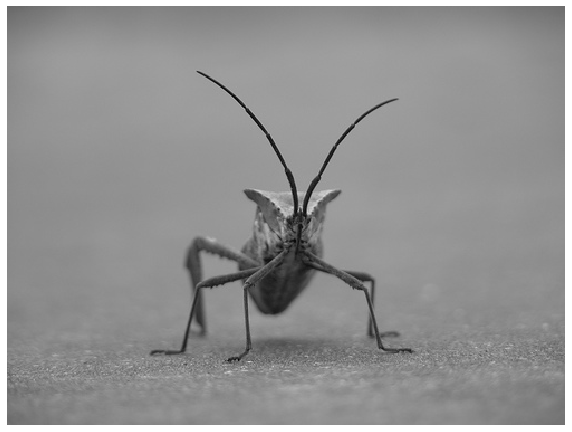

In [24]:
# legge l'immagine come un'array di pixel
image = mp_image.imread('././data/stinkbug.png')
# un po' di sommari

print(image.shape, image.dtype, type(image)) 

# visualizziamo l'immagine
plt.figure(figsize=(10,10))
plt.imshow(image) # display the image
plt.axis('off')
plt.show()


Vediamo com'è fatta l'immagine da vicino

In [25]:
print(image)

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


L'immagine è in formato RGB  (tre canali: R, G e B). Notare che il tipo è `float32`: tutti i valori sono salati. 
Di fatto è possibile riportare il tutto a 24 bit trasformando l'immagine

(375, 500, 3) uint8 <class 'numpy.ndarray'>


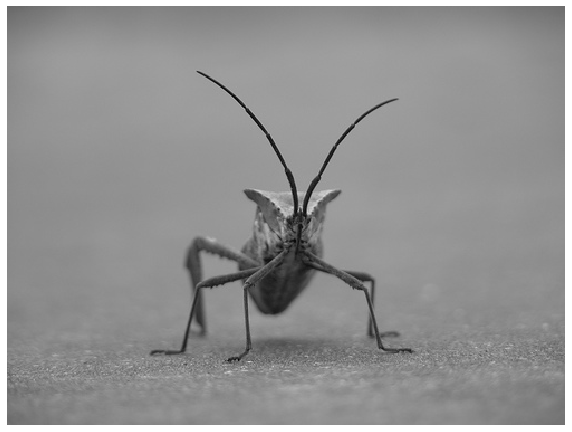

In [30]:
image1 = np.asarray(image*255,dtype="uint8")

print(image1.shape, image1.dtype, type(image1)) 

# visualizziamo l'immagine
plt.figure(figsize=(10,10))
plt.imshow(image1) # display the image
plt.axis('off')
plt.show()

Se esploriamo l'immagine vediamo questo

In [31]:
print(image1)

[[[104 104 104]
  [104 104 104]
  [104 104 104]
  ...
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 [[105 105 105]
  [105 105 105]
  [105 105 105]
  ...
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 [[107 107 107]
  [106 106 106]
  [106 106 106]
  ...
  [110 110 110]
  [110 110 110]
  [110 110 110]]

 ...

 [[112 112 112]
  [111 111 111]
  [110 110 110]
  ...
  [116 116 116]
  [115 115 115]
  [115 115 115]]

 [[113 113 113]
  [113 113 113]
  [112 112 112]
  ...
  [115 115 115]
  [114 114 114]
  [114 114 114]]

 [[113 113 113]
  [115 115 115]
  [115 115 115]
  ...
  [114 114 114]
  [114 114 114]
  [113 113 113]]]


Cosa notate dell'immagine? E' in toni di grigio, poiché i tre colori sono identici. 
Quindi, se proviamo a plottare 